In [1]:
import numpy as np
from keras.layers import Input, Dense, Activation, BatchNormalization
from keras.layers import ZeroPadding2D, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D, Flatten
from keras.models import Model
import idx2numpy
import matplotlib.pyplot as plt
from keras.preprocessing import image
from matplotlib.pyplot import imshow

(10000, 28, 28, 1)
(60000, 28, 28, 1)
(10000, 10)
(60000, 10)


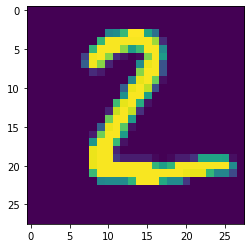

In [2]:
test_X = idx2numpy.convert_from_file('datamnist/test_image.idx3-ubyte')
train_X = idx2numpy.convert_from_file('datamnist/train_image.idx3-ubyte')

test_Y = idx2numpy.convert_from_file('datamnist/test_labels.idx1-ubyte')
train_Y = idx2numpy.convert_from_file('datamnist/train_labels.idx1-ubyte')

def one_hot(X):
    onehot = np.zeros((X.shape[0], np.max(X)+1))
    for i in range(X.shape[0]):
        onehot[i][X[i,]]= 1
    return onehot

train_Y = train_Y.reshape(train_Y.shape[0],1)
train_Y = one_hot(train_Y)
test_Y = test_Y.reshape(test_Y.shape[0],1)
test_Y = one_hot(test_Y)

plt.imshow(test_X[1,:,:])
train_X= train_X.reshape(train_X.shape[0],train_X.shape[1],train_X.shape[2],1)/255.
test_X= test_X.reshape(test_X.shape[0],test_X.shape[1],test_X.shape[2],1)/255.

print(test_X.shape)
print(train_X.shape)
print(test_Y.shape)
print(train_Y.shape)

In [3]:
def Mnist_CNN(input_shape):
    X_input = Input(input_shape)
    X = Conv2D(6, (1,1))(X_input)
    X = MaxPooling2D(2,2)(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    X = Conv2D(16, (5,5))(X)
    X = MaxPooling2D(2,2)(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    X = Flatten()(X)
    X = Dense(10, activation = 'softmax')(X)
    
    model = Model(inputs = X_input, outputs = X, name = 'Mnist_CNN')
    return model

In [4]:
Mnist_CNN = Mnist_CNN(train_X.shape[1:])

In [5]:
Mnist_CNN.compile(optimizer = 'adam',loss ='categorical_crossentropy', metrics = ["accuracy"])

In [6]:
Mnist_CNN.fit(x = train_X, y = train_Y, epochs = 5, batch_size = 32)

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3982 - accuracy: 0.8872
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0779 - accuracy: 0.9758
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0610 - accuracy: 0.9815
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0480 - accuracy: 0.9848
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0409 - accuracy: 0.9876


In [7]:
preds_train = Mnist_CNN.evaluate(x = train_X, y = train_Y)
preds_test = Mnist_CNN.evaluate(x = test_X, y = test_Y)

print()
print ("Loss = " + str(preds_train[0]))
print ("Train Accuracy = " + str(preds_train[1]))

print()
print ("Loss = " + str(preds_test[0]))
print ("Test Accuracy = " + str(preds_test[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.0674 - accuracy: 0.9784

Loss = 0.054646652191877365
Train Accuracy = 0.9823333621025085

Loss = 0.0673561617732048
Test Accuracy = 0.9783999919891357


In [8]:
Mnist_CNN.summary()

Model: "Mnist_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         12        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 6)         24        
_________________________________________________________________
activation (Activation)      (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0 

8


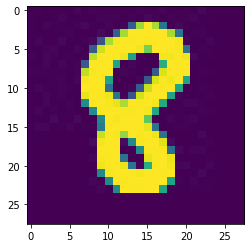

In [18]:
img_path = 'images/8.jpg'
img = image.load_img(img_path, grayscale=True, target_size=(28, 28))
imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.
y = list(Mnist_CNN.predict(x)[0])
print(y.index(max(y)))


3


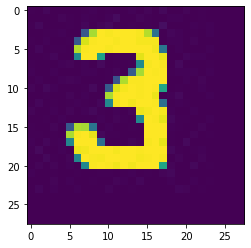

In [19]:
img_path = 'images/3.jpg'
img = image.load_img(img_path, grayscale=True, target_size=(28, 28))
imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.
y = list(Mnist_CNN.predict(x)[0])
print(y.index(max(y)))